In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
data = pd.read_csv('./data/rotten_tomatoes_20200726.csv', 
                            index_col=0,header=0, 
                            encoding = "utf8")
data.head(2)

,text,Action and Adventure,Animation,Art House and International,Comedy,Drama,Horror,Kids and Family,Musical and Performing Arts,Mystery and Suspense,Romance,Science Fiction and Fantasy,fresh,rotten,Other
0,A distinctly gallows take on contemporary fina...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0
1,It's an allegory in search of a meaning that n...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0


In [3]:
y_df = data.iloc[:, 1:]

In [4]:
tags = list(y_df.columns)
tags

['Action and Adventure',
 'Animation',
 'Art House and International',
 'Comedy',
 'Drama',
 'Horror',
 'Kids and Family',
 'Musical and Performing Arts',
 'Mystery and Suspense',
 'Romance',
 'Science Fiction and Fantasy',
 'fresh',
 'rotten',
 'Other']

In [5]:
Y = y_df.values
Y[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.]])

In [7]:
num_tags = y_df.shape[1]
num_tags

14

# Load Processed Data

In [9]:
import pickle

file_path = './data/processed.pickle'
with open(file_path, 'rb') as pickle_file:
    text_train = pickle.load(pickle_file)
    y_train = pickle.load(pickle_file)
    text_test = pickle.load(pickle_file)
    y_test = pickle.load(pickle_file)
    comedydramafresh = pickle.load(pickle_file)

In [8]:
review_text = pd.concat([text_train,text_test])

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(review_text)

/home/tao/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/tao/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/tao/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/tao/anaconda3/envs/tf_gpu/lib/python3.7/site-pack

In [11]:
VOCAB_SIZE = len(tokenizer.word_index) + 1 #19793
EMBED_DIM = 100
MAX_LENGTH = review_text.apply(len).max()

In [12]:
X_train = tokenizer.texts_to_sequences(text_train)
X_test = tokenizer.texts_to_sequences(text_test)

X_train_pad = pad_sequences(X_train, maxlen=MAX_LENGTH, padding = 'post')
X_test_pad = pad_sequences(X_test, maxlen=MAX_LENGTH, padding = 'post')

X_train_pad.shape, X_test_pad.shape

((39004, 579), (9751, 579))

In [13]:
exp_test = tokenizer.texts_to_sequences(comedydramafresh)
exp_test_pad = pad_sequences(exp_test, maxlen=MAX_LENGTH, padding = 'post')
exp_test_pad.shape

(557, 579)

In [14]:
import os
import numpy as np

GLOVE_DIR = '../spam_2019/data/'

embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [15]:
embedding_matrix = np.zeros((VOCAB_SIZE, EMBED_DIM))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [18]:
embedding_matrix[2]

array([-1.37689993e-01, -7.99600035e-03,  3.72990012e-01,  6.36780024e-01,
       -1.24650002e-01, -5.68820000e-01,  4.94179994e-01,  2.68839985e-01,
        1.19300000e-01,  1.87820002e-01,  2.71629989e-01,  3.69870007e-01,
        7.26589978e-01,  7.69440010e-02,  4.18000013e-01, -3.06739986e-01,
        4.21209991e-01,  1.50440007e-01, -3.32749993e-01,  2.03319997e-01,
       -2.97509998e-01, -8.57860029e-01,  4.19580013e-01,  5.84739983e-01,
        8.05879980e-02, -3.74110013e-01,  4.64599997e-01, -4.14959997e-01,
        9.80859995e-02, -2.51210004e-01, -1.39789999e-01, -2.36890003e-01,
        4.66459990e-01, -3.05040002e-01, -1.65069997e-01,  2.18419991e-02,
       -3.21040004e-01, -7.68480003e-01, -4.07059997e-01, -8.33289981e-01,
       -1.30649999e-01, -1.99560006e-03,  7.41439998e-01,  1.45449996e-01,
       -1.35959998e-01, -1.02670002e+00, -9.77360010e-02, -8.73619974e-01,
        6.36100024e-02, -7.25189984e-01,  7.35729992e-01, -3.89149994e-01,
        4.41229999e-01,  

In [20]:
X_train_pad[0]

array([2227,   95,   47, 2059,  336,   15,  187,  215, 2049, 5602,  142,
         41, 5139,  515,  294, 1812, 2725,  198,   39,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [21]:
embedding_matrix[2227]

array([-9.88629997e-01,  2.72949994e-01, -2.72469997e-01,  1.46039993e-01,
       -6.50860012e-01,  2.17499994e-02, -6.76859975e-01,  4.22760010e-01,
       -5.10249995e-02,  1.12089999e-01, -1.94299996e-01,  5.03470004e-01,
       -5.65819979e-01, -1.04050004e+00,  4.88420010e-01,  1.85800008e-02,
       -2.44859993e-01, -2.10209996e-01,  1.41670004e-01, -7.03189969e-02,
       -4.47750002e-01, -5.44309974e-01, -1.71030000e-01,  3.37159991e-01,
        1.36830002e-01, -8.50609988e-02, -7.14280009e-02,  3.24860007e-01,
        6.61050022e-01, -6.60130024e-01,  6.00489974e-01,  3.63830000e-01,
       -4.61620003e-01,  5.06429970e-01, -4.63169992e-01,  1.33140003e-02,
       -2.86969990e-01, -1.47430003e-01,  5.01670003e-01, -9.74839985e-01,
        5.07700026e-01, -4.78300005e-02, -2.17209995e-01, -5.83769977e-01,
       -5.50369978e-01,  9.46300030e-01,  3.01750004e-01, -5.17780006e-01,
       -2.59559989e-01, -8.78050029e-01, -3.94529998e-01,  2.87259996e-01,
       -6.82319999e-01,  

In [22]:
X_train[0]

[2227,
 95,
 47,
 2059,
 336,
 15,
 187,
 215,
 2049,
 5602,
 142,
 41,
 5139,
 515,
 294,
 1812,
 2725,
 198,
 39]

In [23]:
embedding_matrix[2227].shape

(100,)

In [26]:
X_train_emb0 = np.zeros(100)

In [28]:
embs = []
for i in X_train[0]:
    embs.append(embedding_matrix[i])
    
embs = np.array(embs)

X_train_emb0 = embs.mean(axis=0)
X_train_emb0.shape
    

(100,)

In [36]:
emb_matrix = []
for x in X_train[:10]:
    embs = []
    embs += [embedding_matrix[i] for i in x]
    embs = np.array(embs)
    X_train_emb0 = embs.mean(axis=0)
    emb_matrix.append(X_train_emb0)
    #break
emb_matrix = np.array(emb_matrix)
emb_matrix.shape

(10, 100)

In [35]:
emb_matrix[0]

array([-0.21779561,  0.17510768,  0.14620495, -0.13094137, -0.13719611,
        0.28776947, -0.18851884,  0.12051058,  0.05781127, -0.18485847,
       -0.04318379,  0.05486426,  0.05952763,  0.01855252,  0.08253697,
        0.00582384, -0.0080829 ,  0.11706526, -0.01323763,  0.09443458,
        0.04123332,  0.00214311, -0.14706895, -0.08864483,  0.17918126,
        0.07622942, -0.14155702, -0.18723893,  0.26792629, -0.17285889,
        0.00137397,  0.25715279,  0.01551879,  0.02965721,  0.00810684,
        0.06350168, -0.17319463,  0.03444853,  0.20779637, -0.19996519,
       -0.09793297, -0.10499731, -0.05050637, -0.37259053, -0.22774569,
        0.0636565 , -0.04587657,  0.00245274, -0.05552756, -0.41116579,
        0.08578847, -0.05982685,  0.04640057,  0.50477   ,  0.01330295,
       -1.19348683,  0.0481254 , -0.04913505,  0.720622  ,  0.05771874,
        0.07862111,  0.52227421, -0.20914321,  0.01378995,  0.23985774,
        0.11177973,  0.22664626,  0.16276821, -0.14758679, -0.19

In [29]:
X_train_emb0

array([-0.21779561,  0.17510768,  0.14620495, -0.13094137, -0.13719611,
        0.28776947, -0.18851884,  0.12051058,  0.05781127, -0.18485847,
       -0.04318379,  0.05486426,  0.05952763,  0.01855252,  0.08253697,
        0.00582384, -0.0080829 ,  0.11706526, -0.01323763,  0.09443458,
        0.04123332,  0.00214311, -0.14706895, -0.08864483,  0.17918126,
        0.07622942, -0.14155702, -0.18723893,  0.26792629, -0.17285889,
        0.00137397,  0.25715279,  0.01551879,  0.02965721,  0.00810684,
        0.06350168, -0.17319463,  0.03444853,  0.20779637, -0.19996519,
       -0.09793297, -0.10499731, -0.05050637, -0.37259053, -0.22774569,
        0.0636565 , -0.04587657,  0.00245274, -0.05552756, -0.41116579,
        0.08578847, -0.05982685,  0.04640057,  0.50477   ,  0.01330295,
       -1.19348683,  0.0481254 , -0.04913505,  0.720622  ,  0.05771874,
        0.07862111,  0.52227421, -0.20914321,  0.01378995,  0.23985774,
        0.11177973,  0.22664626,  0.16276821, -0.14758679, -0.19

In [37]:
def globe_emb(train_array, emb_dim=100):
    emb_matrix = []
    for x in train_array:
        embs = []
        embs += [embedding_matrix[i] for i in x]
        embs = np.array(embs)
        X_train_emb0 = embs.mean(axis=0)
        emb_matrix.append(X_train_emb0)
    emb_matrix = np.array(emb_matrix)
    return emb_matrix

In [38]:
train_matrix = globe_emb(X_train)
test_matrix = globe_emb(X_test)

In [43]:
assert train_matrix.shape[0] == len(X_train)
assert test_matrix.shape[0] == len(X_test)

In [50]:
train_matrix.shape, test_matrix.shape

((39004, 100), (9751, 100))

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

In [56]:
model = Sequential()
#model.add(Input(shape=(100,)))
model.add(Dense(128, activation='relu', input_shape=(100,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_tags, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               12928     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 14)                462       
Total params: 23,726
Trainable params: 23,726
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.fit(train_matrix, y_train,
          batch_size=32,
          epochs=20,
          validation_split=0.1)

print('Eval loss/accuracy:{}'.format(model.evaluate(test_matrix, y_test, batch_size = 32)))

Train on 35103 samples, validate on 3901 samples
Epoch 1/20
35103/35103 [==============================] - 6s 173us/sample - loss: 0.3803 - acc: 0.8293 - val_loss: 0.3291 - val_acc: 0.8501
Epoch 2/20
35103/35103 [==============================] - 6s 174us/sample - loss: 0.3049 - acc: 0.8638 - val_loss: 0.2722 - val_acc: 0.8789
Epoch 3/20
35103/35103 [==============================] - 6s 175us/sample - loss: 0.2555 - acc: 0.8884 - val_loss: 0.2334 - val_acc: 0.8988
Epoch 4/20
35103/35103 [==============================] - 6s 177us/sample - loss: 0.2205 - acc: 0.9050 - val_loss: 0.2056 - val_acc: 0.9113
Epoch 5/20
35103/35103 [==============================] - 6s 174us/sample - loss: 0.1963 - acc: 0.9164 - val_loss: 0.1877 - val_acc: 0.9197
Epoch 6/20
35103/35103 [==============================] - 6s 181us/sample - loss: 0.1793 - acc: 0.9239 - val_loss: 0.1778 - val_acc: 0.9240
Epoch 7/20
35103/35103 [==============================] - 6s 176us/sample - loss: 0.1665 - acc: 0.9289 - val_lo

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
Using TensorFlow backend.
keras is no longer supported, please use tf.keras instead.


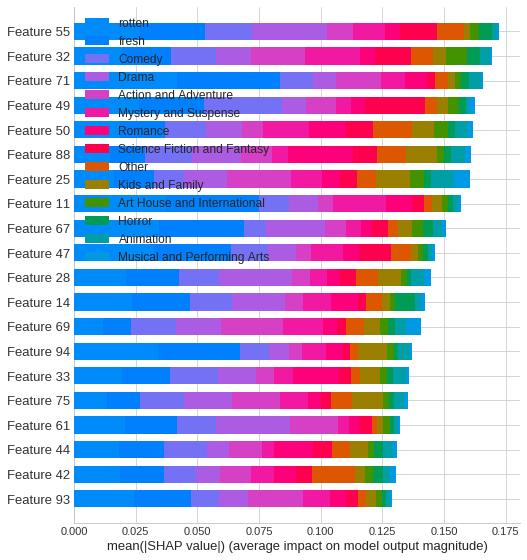

In [58]:
import shap

attrib_data = train_matrix[:3000]
explainer = shap.DeepExplainer(model, attrib_data)
num_explanations = 100
shap_vals = explainer.shap_values(test_matrix[:num_explanations])

shap.summary_plot(shap_vals, class_names=y_df.columns)

In [59]:
embedding_matrix.shape

(19793, 100)

In [60]:
np.argmax(embedding_matrix[55])

20

In [77]:
#np.argpartition(embedding_matrix[55], -5)[-5:]
idx = np.argpartition(embedding_matrix[55], -10)[-10:]
sorted_idx = idx[np.argsort(embedding_matrix[55][idx])]

In [78]:
word_lookup = {v:k for k,v in tokenizer.word_index.items()}

for i in sorted_idx:
    print(word_lookup[i])

meet
becom
adapt
see
follow
old
big
life
perform
find


In [71]:
idx = np.argpartition(embedding_matrix[32], -5)[-5:]
sorted_idx = idx[np.argsort(embedding_matrix[32][idx])]
for i in sorted_idx:
    print(word_lookup[i])

award
town
life
good
even


In [72]:
idx = np.argpartition(embedding_matrix[71], -5)[-5:]
sorted_idx = idx[np.argsort(embedding_matrix[71][idx])]
for i in sorted_idx:
    print(word_lookup[i])

direct
team
good
even
award


In [73]:
idx = np.argpartition(embedding_matrix[49], -5)[-5:]
sorted_idx = idx[np.argsort(embedding_matrix[49][idx])]
for i in sorted_idx:
    print(word_lookup[i])

even
good
award
world
town


In [74]:
idx = np.argpartition(embedding_matrix[50], -5)[-5:]
sorted_idx = idx[np.argsort(embedding_matrix[50][idx])]
for i in sorted_idx:
    print(word_lookup[i])

good
org
award
town
even


In [76]:
shap_vals[0].shape

(100, 100)

Action and Adventure


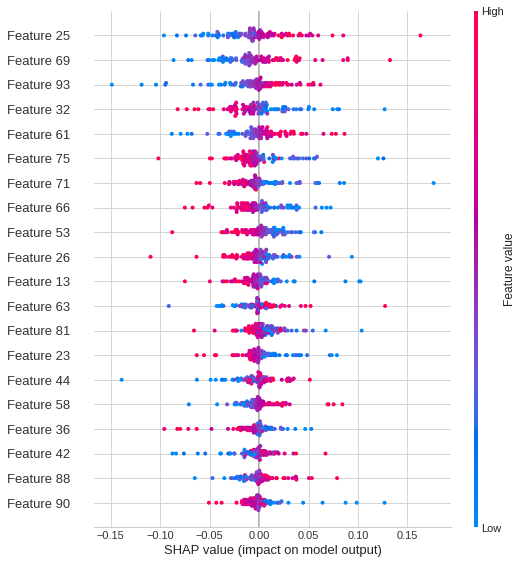

Animation


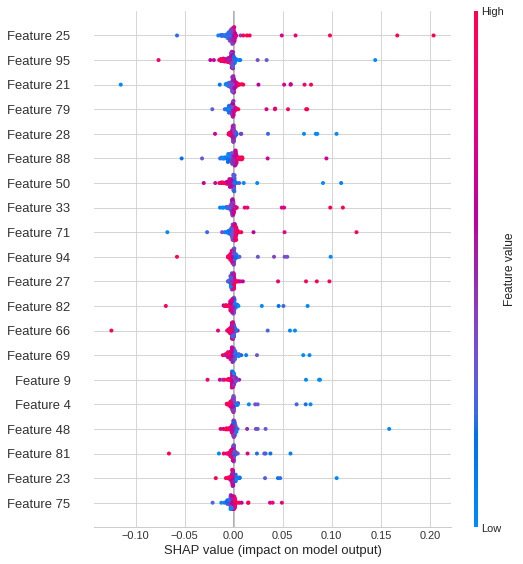

Art House and International


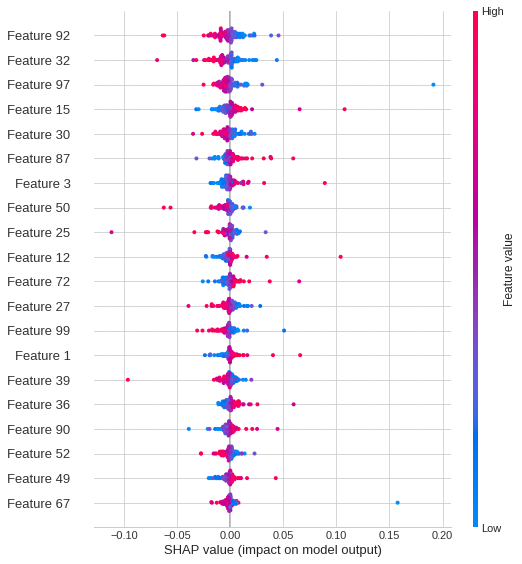

Comedy


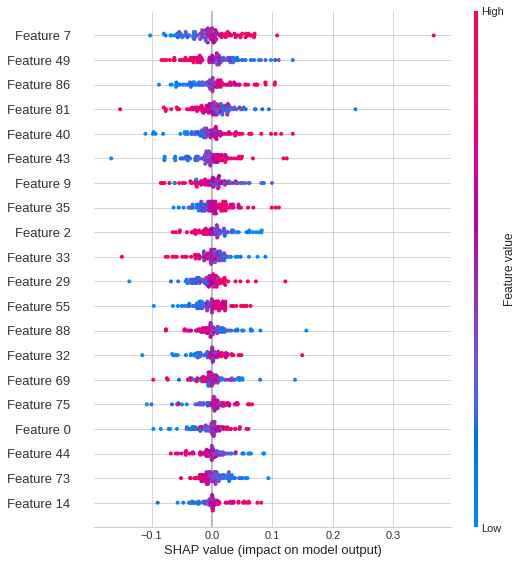

Drama


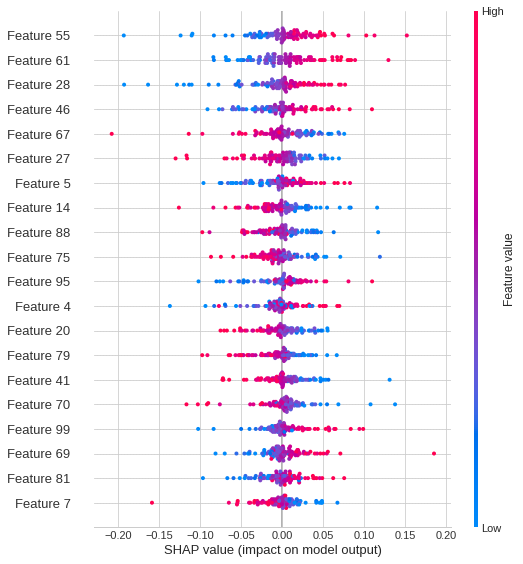

Horror


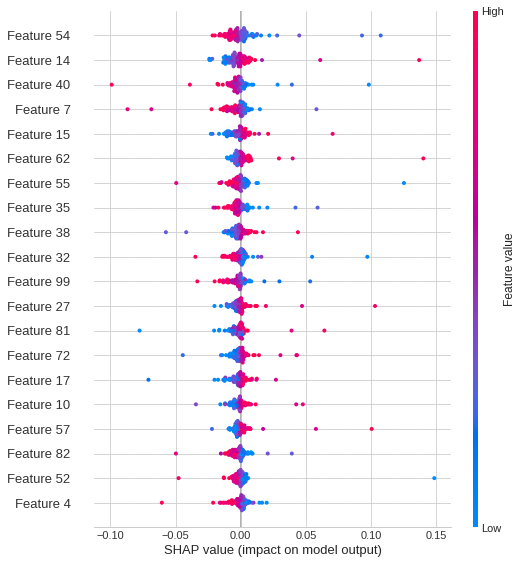

Kids and Family


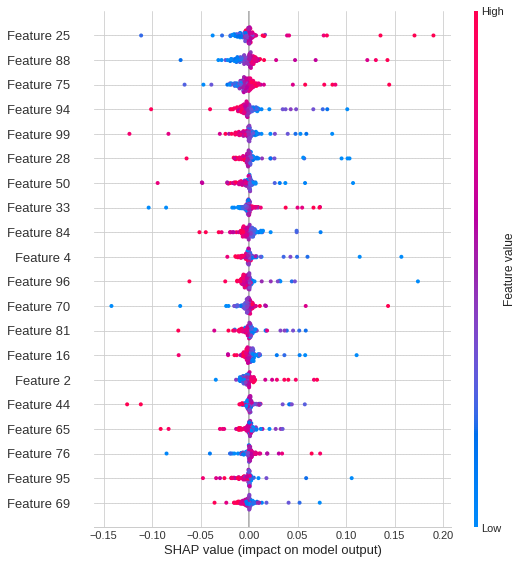

Musical and Performing Arts


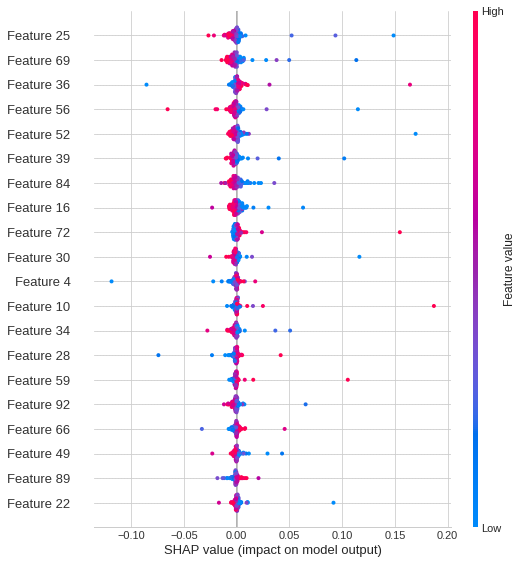

Mystery and Suspense


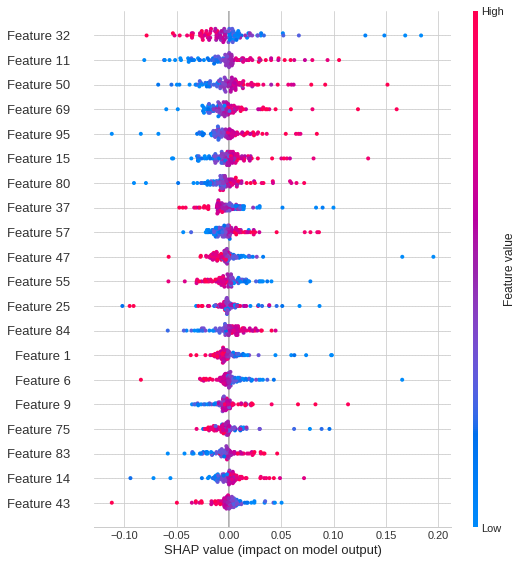

Romance


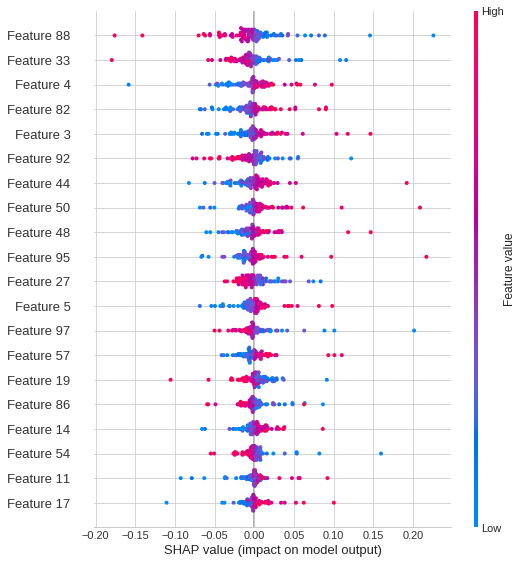

Science Fiction and Fantasy


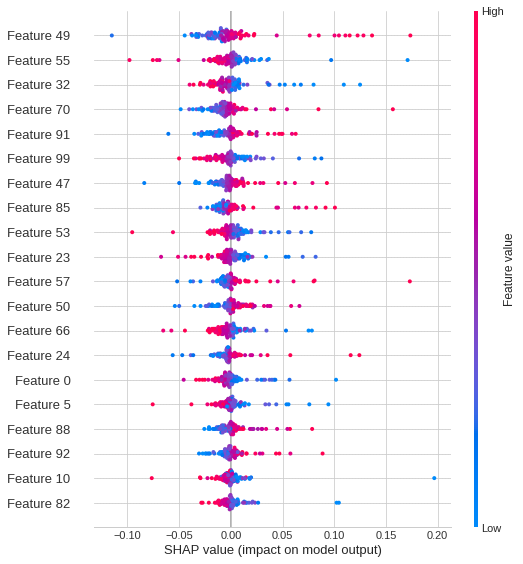

fresh


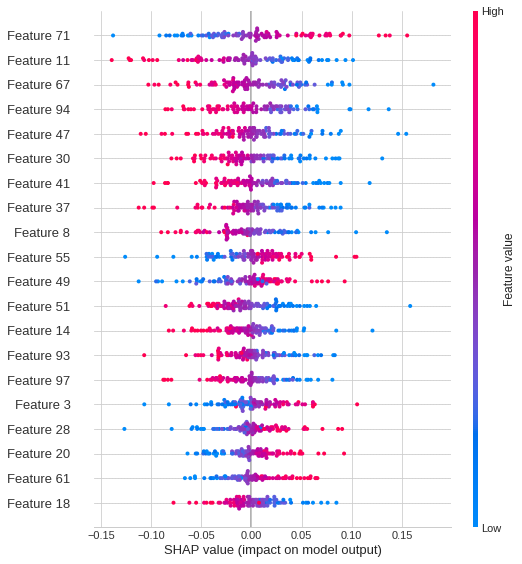

rotten


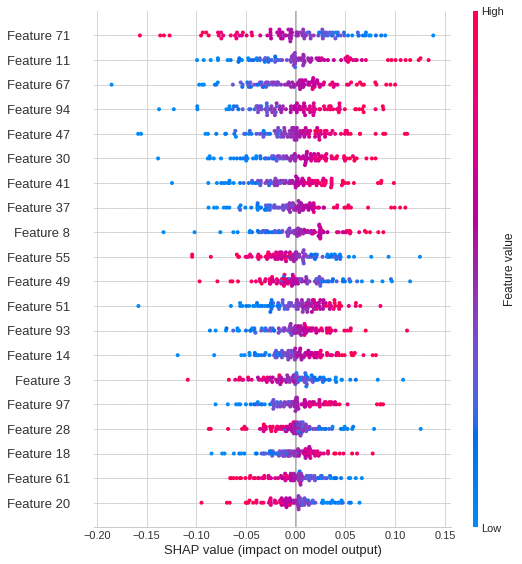

Other


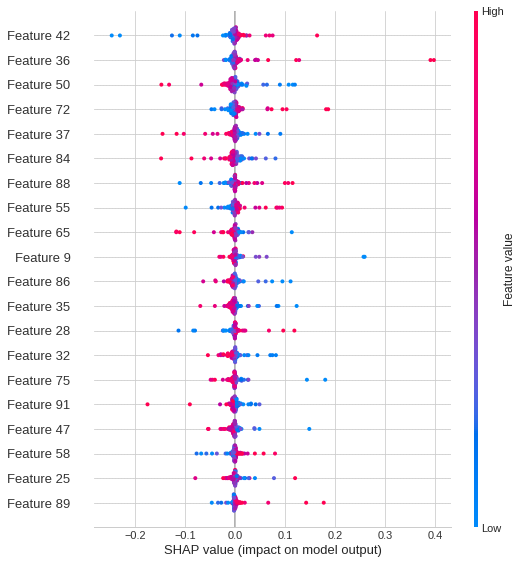

In [80]:
for i in range(14):
    print(y_df.columns[i])
    shap.summary_plot(shap_vals[i], test_matrix[:num_explanations])

In [81]:
idx = np.argpartition(embedding_matrix[25], -10)[-10:]
sorted_idx = idx[np.argsort(embedding_matrix[25][idx])]
for i in sorted_idx:
    print(word_lookup[i])

true
thriller
good
power
comedi
world
help
come
town
award


In [82]:
idx = np.argpartition(embedding_matrix[69], -10)[-10:]
sorted_idx = idx[np.argsort(embedding_matrix[69][idx])]
for i in sorted_idx:
    print(word_lookup[i])

old
get
wife
hes
world
team
turn
featur
town
even


In [83]:
idx = np.argpartition(embedding_matrix[7], -10)[-10:]
sorted_idx = idx[np.argsort(embedding_matrix[7][idx])]
for i in sorted_idx:
    print(word_lookup[i])

life
get
go
look
beauti
way
movi
man
best
littl


In [84]:
# comedy
idx = np.argpartition(embedding_matrix[49], -10)[-10:]
sorted_idx = idx[np.argsort(embedding_matrix[49][idx])]
for i in sorted_idx:
    print(word_lookup[i])

return
get
run
love
romant
even
good
award
world
town


In [85]:
# drama
idx = np.argpartition(embedding_matrix[55], -10)[-10:]
sorted_idx = idx[np.argsort(embedding_matrix[55][idx])]
for i in sorted_idx:
    print(word_lookup[i])

meet
becom
adapt
see
follow
old
big
life
perform
find


In [86]:
# drama
idx = np.argpartition(embedding_matrix[54], -10)[-10:]
sorted_idx = idx[np.argsort(embedding_matrix[54][idx])]
for i in sorted_idx:
    print(word_lookup[i])

woman
cardin
best
boy
find
town
come
much
good
award


In [88]:
# romance
idx = np.argpartition(embedding_matrix[88], -10)[-10:]
sorted_idx = idx[np.argsort(embedding_matrix[88][idx])]
for i in sorted_idx:
    if i != 0:
        print(word_lookup[i])

love
live
get
name
help
comedi
org
time
even
